https://colab.research.google.com/drive/1fTBX7-fI6pyLPk3mMNdhP5gUcMeaef3f?authuser=1#scrollTo=1uzd4DpDG--J

https://colab.research.google.com/drive/1U513UUXfRY5o2ZXs82kgFaG6lZhdUbji?authuser=1#scrollTo=0-z_WkeNzz5s

### FUNCOES DE APOIO

#### Distribuicao dos dados

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

def plot_distribuicao_faixa_etaria(df, coluna):
    plt.figure(figsize=(15, 6))
    coluna_foco = coluna

    if coluna == 'Idade':
        def classificar_idade(idade):
            if idade <= 11:
                return 'Infância <= 11'
            elif idade <= 17:
                return 'Adolescência 12 - 17'
            elif idade <= 29:
                return 'Adulto jovem 18 - 29'
            elif idade <= 59:
                return 'Adulto 30 - 59'
            else:
                return 'Idoso >= 60'

        coluna_foco = 'Faixa Etária'
        df[coluna_foco] = df[coluna].apply(classificar_idade)
        ordem_faixas = ['Infância <= 11', 'Adolescência 12 - 17',
                        'Adulto jovem 18 - 29', 'Adulto 30 - 59', 'Idoso >= 60']
        contagem = df[coluna_foco].value_counts().reindex(ordem_faixas)
        porcentagem = df[coluna_foco].value_counts(normalize=True).reindex(ordem_faixas) * 100
    else:
        contagem = df[coluna_foco].value_counts()
        porcentagem = df[coluna_foco].value_counts(normalize=True) * 100

    # Preparar DataFrame para plotagem
    df_plot = porcentagem.reset_index()
    df_plot.columns = [coluna_foco, 'Porcentagem']
    contagem = contagem.values

    # Gráfico de barras
    sns.barplot(x=coluna_foco, y='Porcentagem', data=df_plot, color='skyblue')

    # Linha com marcadores
    sns.lineplot(x=np.arange(len(df_plot)), y='Porcentagem', data=df_plot, color='blue', marker='o')

    # Anotações nos pontos
    for i, (abs_val, pct) in enumerate(zip(contagem, df_plot['Porcentagem'])):
        plt.text(i, pct + 0.5, f'{abs_val}\n{pct:.1f}%', ha='center', va='bottom', fontsize=10)

    # Ajustes visuais
    plt.title(f'Distribuição percentual por {coluna_foco}', fontsize=14)
    plt.ylabel('Porcentagem (%)')
    plt.xlabel(coluna_foco)
    plt.ylim(0, max(df_plot['Porcentagem']) + 10)

    # Rotacionar rótulos se muitos
    if len(df_plot[coluna_foco]) > 5:
        plt.xticks(rotation=45, ha='right')

    plt.tight_layout()

    # Criar a pasta 'images' se não existir
    os.makedirs("images", exist_ok=True)

    # Salvar a imagem com nome baseado na coluna analisada
    nome_arquivo = f"images/distribuicao_{coluna_foco.replace(' ', '_').lower()}.png"
    plt.savefig(nome_arquivo, dpi=300)


    plt.show()


In [3]:
# pip install folium

#### Distribuição geografica

#### FOLIUM

In [4]:
import folium
import requests
import pandas as pd
import os


def mostrar_distribuicao_por_estados(dados_tesouro: pd.DataFrame):

    # 1. Contar e mapear
    contagem = dados_tesouro['UF do Investidor'].value_counts()
    sigla_para_nome = {
        'AC': 'Acre', 'AL': 'Alagoas', 'AP': 'Amapá', 'AM': 'Amazonas', 'BA': 'Bahia',
        'CE': 'Ceará', 'DF': 'Distrito Federal', 'ES': 'Espírito Santo', 'GO': 'Goiás',
        'MA': 'Maranhão', 'MT': 'Mato Grosso', 'MS': 'Mato Grosso do Sul', 'MG': 'Minas Gerais',
        'PA': 'Pará', 'PB': 'Paraíba', 'PR': 'Paraná', 'PE': 'Pernambuco', 'PI': 'Piauí',
        'RJ': 'Rio de Janeiro', 'RN': 'Rio Grande do Norte', 'RS': 'Rio Grande do Sul',
        'RO': 'Rondônia', 'RR': 'Roraima', 'SC': 'Santa Catarina', 'SP': 'São Paulo',
        'SE': 'Sergipe', 'TO': 'Tocantins'
    }
    df_mapa = contagem.rename(index=sigla_para_nome).reset_index()
    df_mapa.columns = ['Estado', 'Investidores']

    # 2. Coordenadas centrais aproximadas dos estados
    coordenadas_estados = {
        'Acre': [-9.0238, -70.8120], 'Alagoas': [-9.5713, -36.7820], 'Amapá': [1.3730, -52.5547],
        'Amazonas': [-3.4168, -65.8561], 'Bahia': [-12.5797, -41.7007], 'Ceará': [-5.4984, -39.3206],
        'Distrito Federal': [-15.7998, -47.8645], 'Espírito Santo': [-19.1834, -40.3089],
        'Goiás': [-15.8270, -49.8362], 'Maranhão': [-5.4200, -45.2190], 'Mato Grosso': [-12.6819, -56.9211],
        'Mato Grosso do Sul': [-20.7722, -54.7852], 'Minas Gerais': [-18.5122, -44.5550],
        'Pará': [-3.4168, -52.3330], 'Paraíba': [-7.2399, -36.7819], 'Paraná': [-24.8949, -51.9620],
        'Pernambuco': [-8.8137, -36.9541], 'Piauí': [-7.7183, -42.7289], 'Rio de Janeiro': [-22.9068, -43.1729],
        'Rio Grande do Norte': [-5.4026, -36.9541], 'Rio Grande do Sul': [-30.0346, -51.2177],
        'Rondônia': [-10.9432, -62.8278], 'Roraima': [2.7376, -62.0751], 'Santa Catarina': [-27.5954, -48.5480],
        'São Paulo': [-23.5505, -46.6333], 'Sergipe': [-10.5741, -37.3857], 'Tocantins': [-10.1753, -48.2982]
    }

    # 3. Baixar GeoJSON
    url_geojson = 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson'
    geojson_data = requests.get(url_geojson).json()

    # 3. Adicionar número de investidores diretamente ao GeoJSON
    for feature in geojson_data['features']:
        estado = feature['properties']['name']
        investidores = df_mapa[df_mapa['Estado'] == estado]['Investidores'].values
        if len(investidores) > 0:
            feature['properties']['investidores'] = str(investidores[0])
        else:
            feature['properties']['investidores'] = "0"

    # 4. Criar mapa
    mapa = folium.Map(location=[-14.2350, -51.9253], 
                      zoom_start=4,
                    #   width='600px',
                    #   height='400px',
                      control_scale=True
                      )

    # 5. Adicionar camada choropleth
    folium.Choropleth(
        geo_data=geojson_data,
        name='choropleth',
        data=df_mapa,
        columns=['Estado', 'Investidores'],
        key_on='feature.properties.name',
        fill_color='Blues',
        fill_opacity=0.8,
        line_opacity=0.3,
        legend_name='Quantidade de Investidores por Estado',
        highlight=True
    ).add_to(mapa)

    # 6. Adicionar tooltip com o número de investidores
    folium.GeoJson(
        geojson_data,
        name="labels",
        tooltip=folium.GeoJsonTooltip(
            fields=["name", "investidores"],
            aliases=["Estado:", "Investidores:"],
            labels=True,
            sticky=True
        ),
        style_function=lambda x: {
            'color': 'transparent',
            'fillOpacity': 0
        }
    ).add_to(mapa)

    # 6. Adicionar marcadores de texto fixos com os valores
    for _, row in df_mapa.iterrows():
        estado = row['Estado']
        investidores = row['Investidores']
        if estado in coordenadas_estados:
            lat, lon = coordenadas_estados[estado]
            folium.map.Marker(
                [lat, lon],
                icon=folium.DivIcon(html=f"""
                    <div style="font-size: 10pt; color: black; text-align: center;">
                        <b>{investidores}</b>
                    </div>""")
            ).add_to(mapa)


    # 7. Salvar o mapa na pasta 'images'

    os.makedirs("images", exist_ok=True)  # cria pasta se não existir
    caminho_arquivo = os.path.join("images", "mapa_investidores.html")
    mapa.save(caminho_arquivo)

    print(f"Mapa salvo em: {caminho_arquivo}")


    # 7. Exibir mapa
    return mapa


In [5]:
import os
import time
import folium
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager  # opcional para instalar o driver automaticamente

def salvar_mapa_como_imagem(mapa: folium.Map, caminho_html='images/mapa_investidores.html', caminho_png='images/mapa_investidores.png'):
    # Salva o mapa como HTML
    os.makedirs(os.path.dirname(caminho_html), exist_ok=True)
    mapa.save(caminho_html)

    # Configurações do navegador headless
    options = Options()
    options.headless = True
    options.add_argument('--window-size=1200,800')
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-dev-shm-usage')

    # Inicia o navegador com chromedriver
    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service, options=options)

    try:
        # Abrir o arquivo HTML local
        full_path = 'file://' + os.path.abspath(caminho_html)
        driver.get(full_path)

        # Aguarda carregar
        time.sleep(3)

        # Tira o screenshot
        driver.save_screenshot(caminho_png)
        print(f"📸 Imagem salva em: {caminho_png}")
    finally:
        driver.quit()


#### GEOPANDAS

In [6]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
import os

def mostrar_distribuicao_por_estados_png(dados_tesouro: pd.DataFrame, titulo: str = "Distribuição de Investidores por Estado", nome_png: str="mapa_investidor_total"):
    # Contar investidores por estado
    contagem = dados_tesouro['UF do Investidor'].value_counts()
    sigla_para_nome = {
        'AC': 'Acre', 'AL': 'Alagoas', 'AP': 'Amapá', 'AM': 'Amazonas', 'BA': 'Bahia',
        'CE': 'Ceará', 'DF': 'Distrito Federal', 'ES': 'Espírito Santo', 'GO': 'Goiás',
        'MA': 'Maranhão', 'MT': 'Mato Grosso', 'MS': 'Mato Grosso do Sul', 'MG': 'Minas Gerais',
        'PA': 'Pará', 'PB': 'Paraíba', 'PR': 'Paraná', 'PE': 'Pernambuco', 'PI': 'Piauí',
        'RJ': 'Rio de Janeiro', 'RN': 'Rio Grande do Norte', 'RS': 'Rio Grande do Sul',
        'RO': 'Rondônia', 'RR': 'Roraima', 'SC': 'Santa Catarina', 'SP': 'São Paulo',
        'SE': 'Sergipe', 'TO': 'Tocantins'
    }
    df_mapa = contagem.rename(index=sigla_para_nome).reset_index()
    df_mapa.columns = ['Estado', 'Investidores']

    # Baixar GeoJSON e carregar com GeoPandas
    url_geojson = 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson'
    geojson_path = 'brazil_states.geojson'

    if not os.path.exists(geojson_path):
        with open(geojson_path, 'w', encoding='utf-8') as f:
            f.write(requests.get(url_geojson).text)

    gdf = gpd.read_file(geojson_path)

    # Merge com contagem
    gdf = gdf.merge(df_mapa, how='left', left_on='name', right_on='Estado')
    gdf['Investidores'] = gdf['Investidores'].fillna(0)

    # Calcular centróides para colocar os valores
    gdf['centroid'] = gdf.geometry.centroid

    # Plotar mapa
    fig, ax = plt.subplots(figsize=(12, 8.2))
    gdf.plot(column='Investidores', ax=ax, cmap='Blues', legend=True,
             legend_kwds={'label': "Quantidade de Investidores"}, edgecolor='gray')

    # Adicionar valores sobre os estados
    for _, row in gdf.iterrows():
        x, y = row['centroid'].x, row['centroid'].y
        ax.text(x, y, f"{int(row['Investidores'])}", fontsize=8, ha='center', va='center', color='black')

    ax.set_title(titulo, fontsize=14)
    ax.axis('off')

    # Salvar PNG
    os.makedirs("images", exist_ok=True)
    caminho_png = os.path.join("images", f"{nome_png}.png")
    plt.savefig(caminho_png, bbox_inches='tight', dpi=300)
    plt.close()

    print(f"Mapa PNG salvo em: {caminho_png}")


# Este colab tem como objetivo estudar o comportamento da base do tesouro direto

In [7]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# import itables
# from itables import init_notebook_mode
# init_notebook_mode(all_interactive=True)

## 1. Extracao dos Dados

In [8]:
# dados_tesouro_principal = pd.read_parquet("./data/sample_investidor_tesouro_direto.parquet")
dados_tesouro_principal = pd.read_parquet("./data/sample_investidor_tesouro_direto.parquet")
dados_tesouro = dados_tesouro_principal.copy().sample(n=100000, random_state=42)
del dados_tesouro_principal
import gc
gc.collect()

20

In [9]:
# from time import sleep
# for i in range(len(dados_tesouro)):
#     print(dados_tesouro.iloc[i])
#     sleep(5)

dados_tesouro.sort_values(by='Data de Adesao',ascending=False)

,Codigo do Investidor,Data de Adesao,Estado Civil,Genero,Profissao,Idade,UF do Investidor,Cidade do Investidor,Pais do Investidor,Situacao da Conta,Operou 12 Meses
242635,14237013,31/10/2024,Solteiro(a),M,EMPRESÁRIO,46,SP,SAO PAULO,BRASIL,A,N
521821,895581,31/10/2024,Solteiro(a),F,SERVIDO PÚBLICO ESTADUAL,42,SP,BARUERI,BRASIL,A,S
1043721,53114175,31/10/2024,Desquitado(a),M,MÉDICO,57,MG,JUIZ DE FORA,BRASIL,A,N
529571,3090421,31/10/2024,Desquitado(a),M,OUTROS,87,RN,NATAL,BRASIL,D,N
444222,14142078,31/10/2024,Solteiro(a),M,ENGENHEIRO,41,MG,UBERABA,BRASIL,A,N
...,...,...,...,...,...,...,...,...,...,...,...
450094,14167684,01/01/1900,Não se aplica,N,Não se aplica,32,MG,UBERABA,BRASIL,A,N
763985,1334133,01/01/1900,Solteiro(a),M,TRABALHADOR DE USINAGEM E METAIS,41,SP,SAO ROQUE,BRASIL,A,N
1007452,13617841,01/01/1900,Solteiro(a),M,ADMINISTRADOR,38,MG,POUSO ALEGRE,BRASIL,D,N
447083,14111141,01/01/1900,Não se aplica,N,Não se aplica,30,MG,SANTA LUZIA,BRASIL,D,N


## 2. Analise Exploratória dos Dados

In [10]:
# Situações de conta existentes no dataset
dados_tesouro['Situacao da Conta'].unique()

array(['A', 'D'], dtype=object)

In [11]:
# Distribuição de idades
min_val_idade = dados_tesouro.Idade.min()
max_val_idade = dados_tesouro.Idade.max()
ind_max_val_idade = dados_tesouro.Idade.idxmax()
print("Valor minimo de idade: ", min_val_idade)
print("Valor maximo de idade: ", max_val_idade)
print("Index do valor maximo de idade: ", ind_max_val_idade)

Valor minimo de idade:  1
Valor maximo de idade:  117
Index do valor maximo de idade:  782167


### 2.1 Tipos de dados e uso de memoria

In [12]:
print(dados_tesouro.info())

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 781974 to 435719
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Codigo do Investidor  100000 non-null  int64 
 1   Data de Adesao        100000 non-null  object
 2   Estado Civil          100000 non-null  object
 3   Genero                100000 non-null  object
 4   Profissao             100000 non-null  object
 5   Idade                 100000 non-null  int64 
 6   UF do Investidor      100000 non-null  object
 7   Cidade do Investidor  100000 non-null  object
 8   Pais do Investidor    100000 non-null  object
 9   Situacao da Conta     100000 non-null  object
 10  Operou 12 Meses       100000 non-null  object
dtypes: int64(2), object(9)
memory usage: 9.2+ MB
None


### 2.2 Quais são as idades e como esta distribuido o dataset com relação ao investimento em tesouro direto?

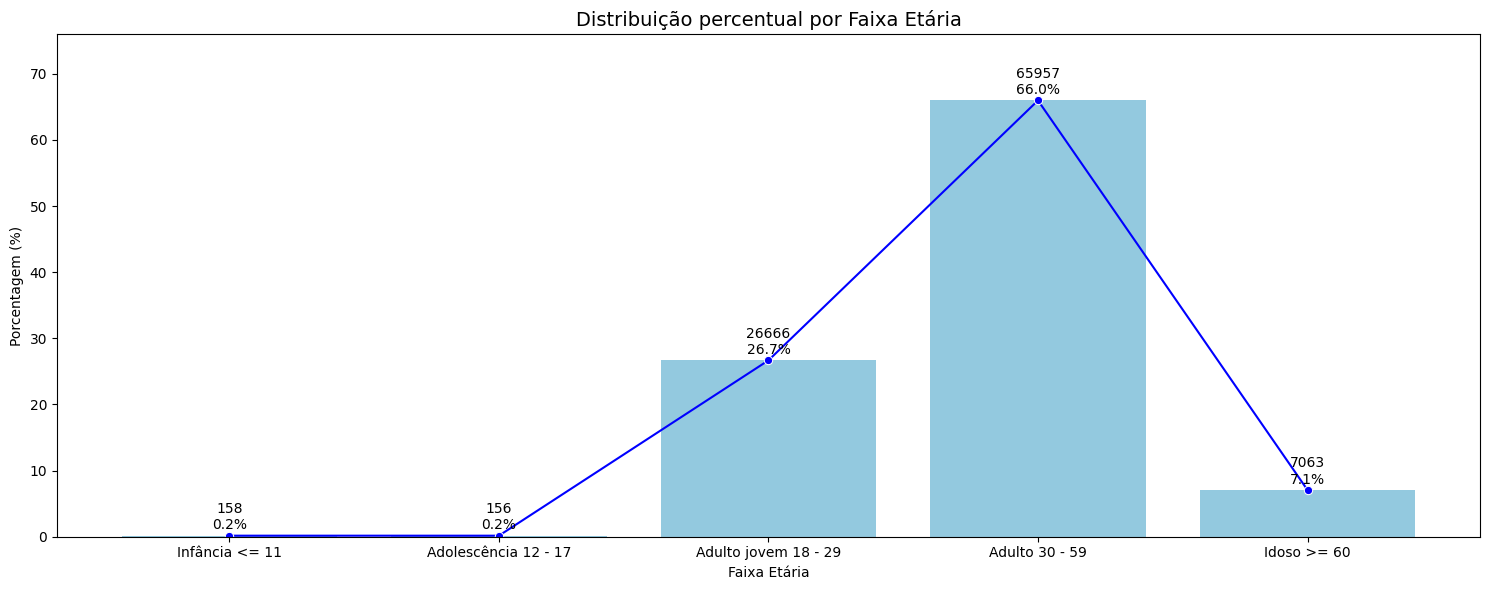

In [13]:
plot_distribuicao_faixa_etaria(dados_tesouro, 'Idade')

/tmp/ipykernel_3472798/963561094.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[coluna_foco] = df[coluna].apply(classificar_idade)


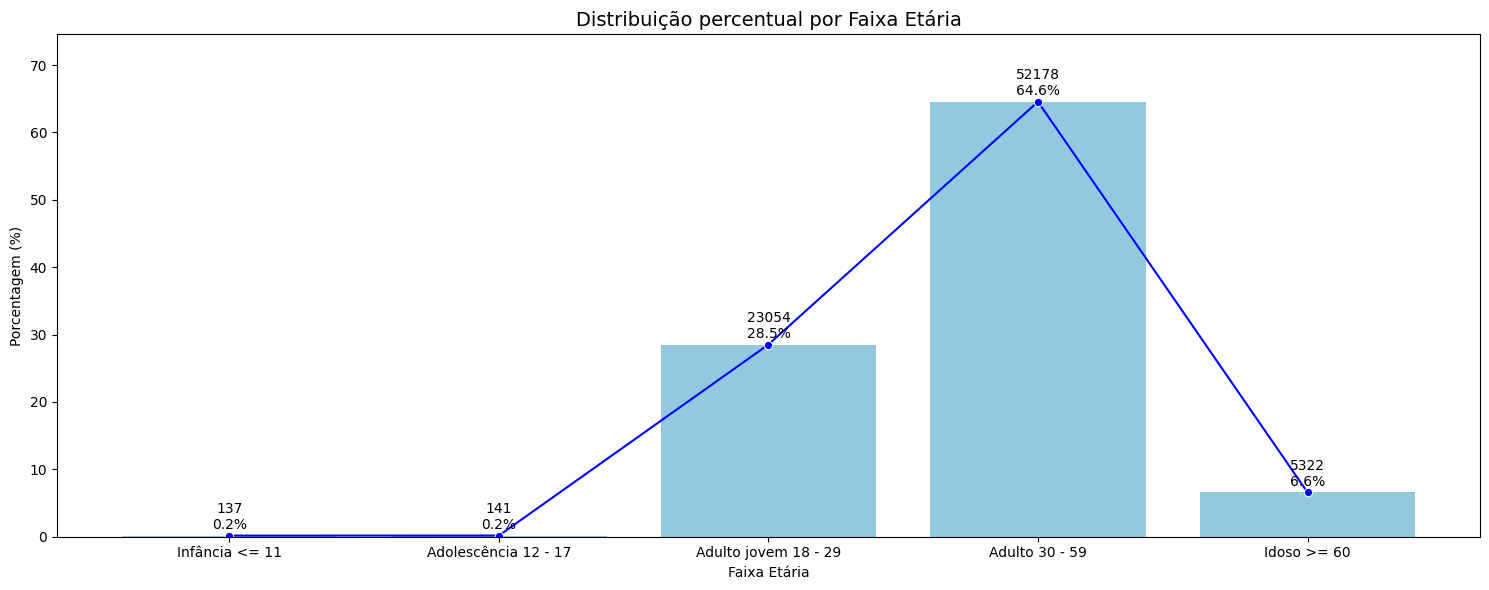

In [14]:
plot_distribuicao_faixa_etaria(dados_tesouro[dados_tesouro['Situacao da Conta']=='A'], 'Idade')

/tmp/ipykernel_3472798/963561094.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[coluna_foco] = df[coluna].apply(classificar_idade)


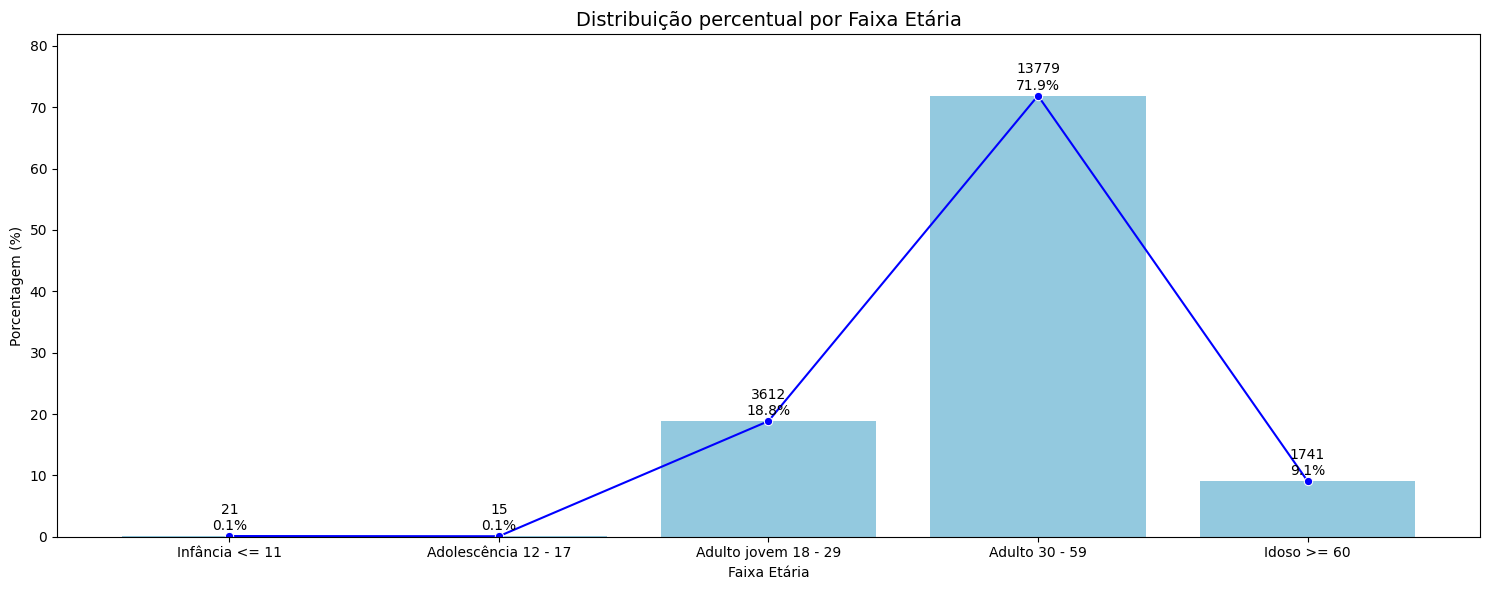

In [15]:
plot_distribuicao_faixa_etaria(dados_tesouro[dados_tesouro['Situacao da Conta']=='D'], 'Idade')

### 2.3 Qual o estado com o maior numeros de pessoas que investem em tesouro direto?

In [16]:
print(dados_tesouro[dados_tesouro['Situacao da Conta']=='D']['UF do Investidor'].value_counts().to_dict())

{'SP': 7076, 'RJ': 1904, 'MG': 1788, 'PR': 1177, 'RS': 940, 'SC': 854, 'BA': 696, 'GO': 591, 'DF': 581, 'PE': 520, 'CE': 468, 'ES': 377, 'MT': 274, 'PA': 273, 'MA': 221, 'MS': 205, 'PB': 201, 'AM': 192, 'RN': 183, 'SE': 129, 'AL': 121, 'PI': 121, 'RO': 92, 'TO': 68, 'AP': 44, 'RR': 40, 'AC': 32}


In [17]:
mostrar_distribuicao_por_estados_png(dados_tesouro, titulo="Distribuição de investidores por estado", nome_png="mapa_investidor_total")

/tmp/ipykernel_3472798/3828821479.py:37: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.geometry.centroid


Mapa PNG salvo em: images/mapa_investidor_total.png


#### 2.3.1 A relacao entre o idh e numero de investidores é diretamente proporcional?

In [18]:
df_idh = pd.read_csv('./another_datas/idh_table.csv', sep='\t')
df_idh = df_idh[['UF', 'Estado', 'IDH-M 2021']]

In [19]:
df_count_investidor_idh = dados_tesouro.groupby('UF do Investidor').size().reset_index(name='Quantidade de Investidores')
# Garantir que as colunas estejam no mesmo formato
df_idh['UF'] = df_idh['UF'].str.strip().str.upper()
df_count_investidor_idh['UF do Investidor'] = df_count_investidor_idh['UF do Investidor'].str.strip().str.upper()
df_agrupado_com_idh = df_count_investidor_idh.merge(df_idh, left_on='UF do Investidor', right_on='UF', how='left')

df_agrupado_com_idh = df_agrupado_com_idh.sort_values(by="IDH-M 2021", ascending=False)
df_agrupado_com_idh_foco = df_agrupado_com_idh[['UF', 'Quantidade de Investidores', 'IDH-M 2021']]

In [20]:
correlacao = df_agrupado_com_idh_foco[['Quantidade de Investidores', 'IDH-M 2021']].corr(method='spearman')
print(correlacao)

                            Quantidade de Investidores  IDH-M 2021
Quantidade de Investidores                    1.000000    0.681325
IDH-M 2021                                    0.681325    1.000000


In [21]:
from scipy.stats import pearsonr

# Supondo que você tenha essas duas colunas no seu DataFrame:
x = df_agrupado_com_idh_foco['Quantidade de Investidores']
y = df_agrupado_com_idh_foco['IDH-M 2021']

# Calcula a correlação e o p-valor
correlacao, p_valor = pearsonr(x, y)

print(f"Correlação de Pearson: {correlacao:.3f}")
print(f"P-valor: {p_valor:.5f}")


Correlação de Pearson: 0.570
P-valor: 0.00192


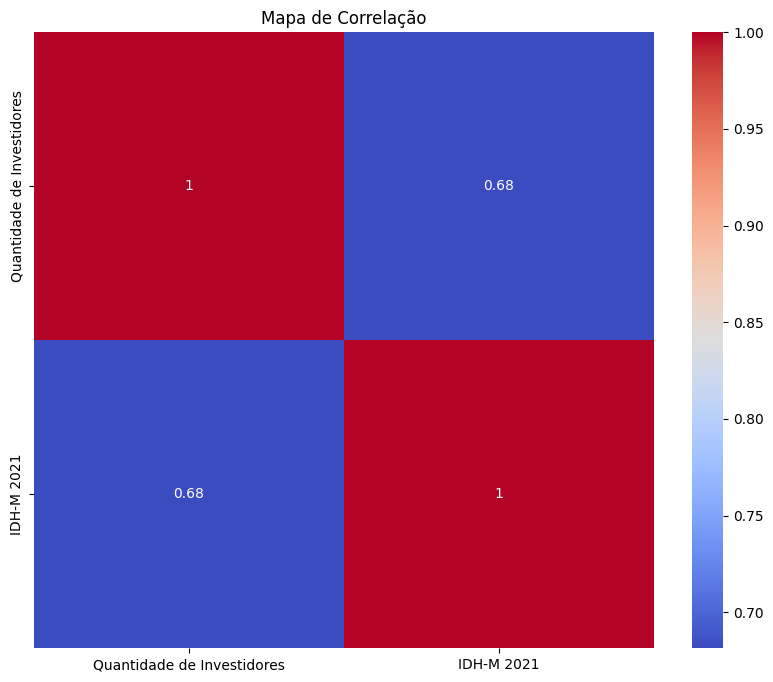

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

correlacoes = df_agrupado_com_idh_foco[['Quantidade de Investidores', 'IDH-M 2021']].corr(method='spearman')
plt.figure(figsize=(10,8))
sns.heatmap(correlacoes, annot=True, cmap='coolwarm')
plt.title('Mapa de Correlação')
plt.show()


### 2.4 Qual a distribuição de genero no dataset?

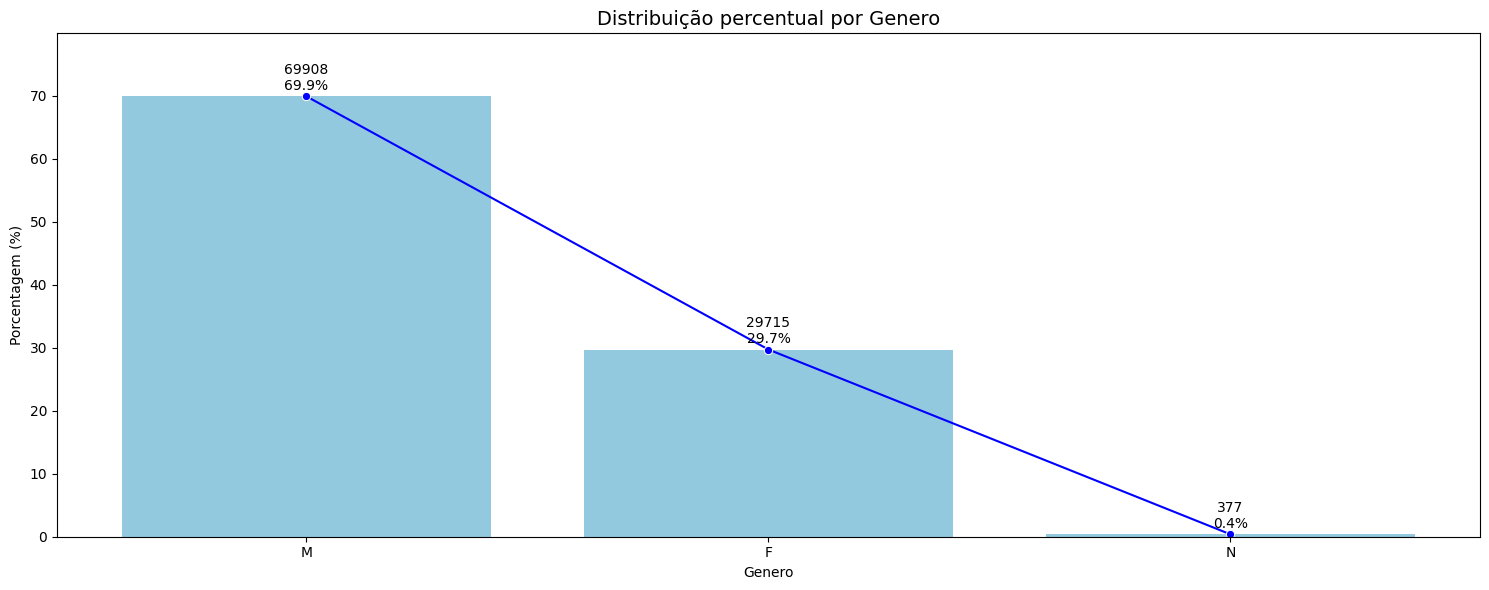

In [23]:
plot_distribuicao_faixa_etaria(dados_tesouro, 'Genero')

### 2.4 Qual a profissão se destaca no dataset?

#### 2.4.1 Criando agrupamentos de profissoes

In [24]:
profissoes_agrupadas = {
    "Não CLTs": ["PROFISSIONAL LIBERAL", 'TRABALHADOR AUTÔNOMO'],
    "Outros": [
        "OUTROS", "Não se aplica", "FALECIDO"
    ],
    "Aposentados e Pensionistas": [
        "APOSENTADO (EXCETO FUNCIONÁRIO PÚBLICO)",
        "FUNCIONÁRIO PÚBLICO CIVIL APOSENTADO",
        "MILITAR REFORMADO", "PENSIONISTA"
    ],
    "Estudantes e Bolsistas": [
        "BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS", "ESTUDANTE"
    ],
    "Funcionários Públicos": [
        "SERVIDOR PÚBLICO FEDERAL", "SERVIDOR PÚBLICO MUNICIPAL", "SERVIDO PÚBLICO ESTADUAL",
        "FUNCIONÁRIO PÚBLICO CIVIL APOSENTADO",
        "OCUPANTE DE CARGO DE DIREÇAO E ASSESSORAMENTO SUPERIOR",
        "OCUPANTE DE CARGO DE DIREÇAO E ASSESSORAMENTO INTERMEDIÁRIO",
        "MEMBRO DO PODER JUDICIÁRIO: MINISTRO DE TRIB. SUPERIOR",
        "MEMBRO DO PODER LEGISLATIVO: SENADOR, DEP.FED.E ESTADUAL",
        "MEMBRO DO PODER EXECUTIVO: PRES.REPÚBLICA, MINISTRO ETC.",
        "DELEGADO DE POLÍCIA", "FISCAL"
    ],
    "Profissionais da Saúde": [
        "MÉDICO", "ODONTÓLOGO E DENTISTA", "ENFERMEIRO E NUTRICIONISTA",
        "FISIOTERAPEUTA E TERAPEUTA OCUPACIONAL", "FARMACÊUTICO", "FONOAUDIÓLOGO",
        "PSICÓLOGO", "BIÓLOGO E BIOMÉDICO", "TÉCNICO DE LABORATÓRIO E RAIO X", 'PROTÉTICO', 'VETERINÁRIO E ZOOTECNISTA'
    ],
    "Engenharia e Tecnologia": [
        "ENGENHEIRO", "TÉCNICO DE MECÂNICA", "TÉCNICO DE ELETRICIDADE, ELETRÔNICA E TELECOMUNICAÇÕES",
        "TÉCNICO DE QUÍMICA", "TÉCNICO DE CONTABILIDADE E DE ESTATÍSTICA",
        "TÉCNICO EM AGRONOMIA E AGRIMENSURA", "TECNOLOGO", "ANALISTA DE SISTEMAS", 'ARQUITETO',
        'TECNÓLOGO'
    ],
    "Direito e Justiça": [
        "ADVOGADO", "PROCURADOR E ASSEMELHADOS", "SERVENTUÁRIO DE JUSTIÇA", "TABELIÃO"
    ],
    "Educação e Pesquisa": [
        "PROFESSOR DE ENSINO SUPERIOR", "PROFESSOR DE PRIMEIRO E SEGUNDO GRAUS",
        "DIRETOR DE ESTABELECIMENTO DE ENSINO",
        'BIBLIOTECÁRIO, ARQUIVISTA, MUSEÓLOGO E ARQUEÓLOGO', 'SOCIÓLOGO',
        'OUTROS TRABALHADORES DE NÍVEL SUPERIOR LIGADOS AO ENSINO'
    ],
    "Ciências Exatas e Humanas": [
        "ECONOMISTA", "SOCIOLOGO", "ESTATÍSTICO", "FÍSICO", "GEÓGRAFO", "GEÓLOGO",
        "ATUÁRIO E MATEMÁTICO"
    ],
    "Comércio e Vendas": [
        "VENDEDOR PRACISTA, REPRESENTANTE COMERCIAL, CAIXEIRO VIAJANTE",
        "VENDEDOR DE COMÉRCIO VAREJISTA E ATACADISTA", "SECURITÁRIO",
        "CORRETOR DE IMÓVEIS, SEGUROS, TÍTULOS E VALORES",
        "FEIRANTE", "JORNALEIRO", "SUPERIOR, INSPETOR E AGENTE DE COMPRAS E VENDAS",'DEMONSTRADOR'
    ],
    "Artes, Comunicação e Entretenimento": [
        "JORNALISTA", "PUBLICITÁRIO", "COMUNICÓLOGO", "RELAÇÕES PÚBLICAS",
        "ATOR E DIRETOR DE ESPETÁCULOS PÚBLICOS", "CANTOR E COMPOSITOR", "MÚSICO",
        "LOCUTOR E COMENTARISTA DE RÁDIO E TELEVISÃO E RADIALISTA",
        "DESENHISTA COMERCIAL", "DESENHISTA TÉCNICO", "DESENHISTA INDUSTRIAL",
        "DECORADOR", "MODELO DE MODAS", "COREÓGRAFO E BAILARINO",
        "PROFISSIONAIS DE LETRAS E DE ARTES", "ESCULTOR, PINTOR E ASSEMELHADOS",
        "DIPLOMATA", "AGENCIADOR DE PROPAGANDA", "OPERADOR DE CÂMARA DE CINEMA E TELEVISÃO"
    ],
    "Administração e Negócios": [
        "ADMINISTRADOR", "GERENTE", "DIRETOR DE EMPRESAS", "COORDENADOR E SUPERVISOR",
        "CONSULTOR", "EMPRESÁRIO", "EMPRESÁRIO ARTÍSTICO E PRODUTOR DE ESPETÁCULOS PÚBLICOS"
    ],
    "Contabilidade e Finanças": [
        "BANCARIO E ECONOMIÁRIO", "CONTADOR", "TRABALHADOR DOS SERVIÇOS DE CONTABILIDADE, DE CAIXA"
    ],
    "Transportes e Logística": [
        "PILOTO DE AERONAVES", "MOTORISTA DE VEÍCULOS DE TRANSPORTE DE PASSAGEIROS",
        "MOTORISTA DE VEICULOS DE TRANSPORTE DE CARGA", "COMISSÁRIO DE BORDO",
        "MAQUINISTA E FOGUISTA DE EMBARCAÇÕES, LOCOMOTIVAS", "COMANDANTE DE EMBARCAÇOES",
        "CONTRAMESTRE DE EMBARCAÇÕES", 'MARINHEIRO E ASSEMELHADOS'
    ],
    "Trabalho Operacional e Técnicos": [
        "MECÂNICO DE MANUTENÇÃO DE VEÍCULOS AUTOMÓVEIS E MÁQUINAS",
        "ELETRICISTA E ASSEMELHADOS", "LANTERNEIRO E PINTOR DE VEÍCULOS METÁLICOS",
        "ELETRICISTA DE MANUTENÇÃO DE VEÍCULOS AUTOMOTORES MÁQUINAS",
        "MECANICO DE MANUTENÇÃO, MONTADOR, PREPARADOR, OPERADOR"
    ],
    "Serviços Gerais": [
        "AUXILIAR DE ESCRITÓRIO E ASSEMELHADOS", "AGENTE ADMINISTRATIVO",
        "PORTEIRO DE EDIFÍCIO, ASCENSORISTA, GARAGISTA E FAXINEIRO",
        "SECRETARIO, ESTENÓGRAFO, DATILÓGRAFO, RECEPCIONISTA,TELEF.",
        "EMPREGADO DOMÉSTICO", "AUXILIAR DE LABORATORIO", "GOVERNANTA DE HOTEL, CAMAREIRO, PORTEIRO, COZINHEIRO"
    ],
    "Religião e Assistência Social": [
        "SACERDOTE OU MEMBRO DE ORDENS OU SEITAS RELIGIOSAS", "ASSISTENTE SOCIAL"
    ],
    "Forças de Segurança e Defesa": [
        "MILITAR EM GERAL", "OFICIAIS DAS FORÇAS ARMADAS E FORÇAS AUXILIARES", "BOMBEIRO"
    ],
    "Proprietários e Renda Passiva": [
        "PROPRIETÁRIO DE ESTABELECIMENTO INDUSTRIAL",
        "PROPRIETÁRIO DE ESTABELECIMENTO COMERCIAL",
        "PROPRIETÁRIO DE ESTABELECIMENTO DE PRESTAÇÃO DE SERVIÇOS",
        "PROPRIETARIO DE MICROEMPRESAS",
        "PROPRIETÁRIO DE IMÓVEL (RECEBENDO RENDIMENTO DE ALUGUEL)",
        "PROPRIETÁRIO DE ESTABELECIMENTO AGRÍCOLA, DA PECUÁRIA",
        "CAPITALISTA, RECEBENDO RENDIMENTO DE APLICAÇÃO DE CAPITAL"
    ],
    "Trabalhadores Rurais e Agropecuários": [
        "TRABALHADOR AGRÍCOLA", "TRABALHADOR DA PECUÁRIA", "AGRONOMO",
        "TÉCNICO EM AGRONOMIA E AGRIMENSURA", "GARIMPEIRO", "TRABALHADOR FLORESTAL", 'TRABALHADOR DA PESCA'
    ],
    "Trabalho Industrial e Produção": [
        "TRABALHADOR DE CONSTRUÇÃO CIVIL", "TRABALHADOR METALÚRGICO E SIDERÚRGICO",
        "TRABALHADOR DE FABRICAÇÃO DE ROUPAS", "TRABALHADOR DE FABRICAÇÃO DE PRODUTOS DE BORRACHA E PLÁSTICO",
        "TRABALHADOR DE FABRICAÇÃO E PREPARAÇÃO DE ALIMENTOS BEBIDAS",
        "TRABALHADOR DE FABRICAÇÃO DE PRODUTOS TÊXTEIS", "TRABALHADOR DE USINAGEM E METAIS",
        "TRABALHADOR DE FABRICAÇÃO DE CALÇADOS E ARTEFATOS DE COURO",
        "TRABALHADOR DE FABRICAÇÃO DE PAPEL E PAPELÃO", "TRABALHADOR DE ARTES GRÁFICAS",
        "TRABALHADOR DE INSTALAÇÕES DE PROCESSAMENTO QUÍMICO",
        "TRABALHADOR DE TRATAMENTO DE FUMO E DE FABR. CIGARROS",
        "TRABALHADOR DE FABRICAÇÃO DE ARTEFATOS DE MADEIRA"
    ],
    "Serviços Específicos": [
        "CABELEIREIRO, BARBEIRO, MANICURE, PEDICURE, MAQUILADOR",
        "LEILOEIRO, AVALIADOR E ASSEMELHADOS", "DESPACHANTE, INCLUSIVE O ADUANEIRO",
        "AGENTE DE SERVIÇOS FUNERÁRIOS E EMBALSAMADOR", "AGENTE DE VIAGEM E GUIA DE TURISMO"
    ],
    "Ciências Naturais e Exatas": [
        "ASTRÔNOMO E METEOROLOGISTA", "QUIMICO", "TÉCNICO DE BIOLOGIA"
    ],
    "Artesanato e Joalheria": [
        "JOALHEIROS E OURIVES", "ALFAIATE"
    ],
    "Esporte": [
        "ATLETA PROFISSIONAL E TÉCNICO EM DESPORTOS"
    ],
    "Carga e Logística Manual": [
        "ESTIVADOR, CARREGADOR, EMBALADOR E ASSEMELHADOS"
    ],
    "Direção e Liderança": [
        "CHEFE INTERMEDIÁRIO", "MESTRE E CONTRAMESTRE"
    ]
}
# Primeiro, invertemos o dicionário: cada profissão vira uma chave apontando para sua área
profissao_para_grupo = {}
for grupo, profissoes in profissoes_agrupadas.items():
    for profissao in profissoes:
        profissao_para_grupo[profissao] = grupo

# Agora aplicamos isso no DataFrame
dados_tesouro['Grupo_Profissao'] = dados_tesouro['Profissao'].map(profissao_para_grupo)


#### 2.4.2 Criando agrupamento de macroprofissoes

In [25]:
macrogrupo_para_grupos = {
    'Economia, Negócios e Administração': [
        'Contabilidade e Finanças',
        'Administração e Negócios',
        'Comércio e Vendas',
        'Proprietários e Renda Passiva',
        'Direção e Liderança'
    ],
    'Serviços Públicos e Segurança': [
        'Funcionários Públicos',
        'Forças de Segurança e Defesa',
        'Religião e Assistência Social',
        'Direito e Justiça'
    ],
    'Educação, Ciência e Pesquisa': [
        'Educação e Pesquisa',
        'Ciências Naturais e Exatas',
        'Ciências Exatas e Humanas',
        'Estudantes e Bolsistas'
    ],
    'Saúde e Bem-estar': [
        'Profissionais da Saúde',
        'Aposentados e Pensionistas'
    ],
    'Engenharia, Tecnologia e Produção': [
        'Engenharia e Tecnologia',
        'Trabalho Industrial e Produção'
    ],
    'Arte, Cultura e Comunicação': [
        'Artes, Comunicação e Entretenimento',
        'Artesanato e Joalheria'
    ],
    'Serviços Gerais e Técnicos': [
        'Serviços Gerais',
        'Serviços Específicos',
        'Trabalho Operacional e Técnicos'
    ],
    'Transporte e Logística': [
        'Transportes e Logística',
        'Carga e Logística Manual'
    ],
    'Agricultura e Meio Rural': [
        'Trabalhadores Rurais e Agropecuários'
    ],
    'Esporte': [
        'Esporte'
    ],
    'Outros': [
        'Outros'
    ],
    'Nao CLTs': [
        'Não CLTs'
    ]
}

# 2. Mapeia o grupo para o macrogrupo
grupo_para_macrogrupo = {}
for macro, grupos in macrogrupo_para_grupos.items():
    for grupo in grupos:
        grupo_para_macrogrupo[grupo] = macro

# 3. Aplica os mapeamentos no DataFrame
dados_tesouro['Macrogrupo_Profissao'] = dados_tesouro['Grupo_Profissao'].map(grupo_para_macrogrupo)



In [26]:
profissoes_geral = dados_tesouro['Macrogrupo_Profissao'].value_counts().reset_index()
profissoes_geral.columns = ['Macrogrupo_Profissao', 'Quantidade']
print(profissoes_geral)


                  Macrogrupo_Profissao  Quantidade
0                               Outros       30312
1   Economia, Negócios e Administração       22856
2    Engenharia, Tecnologia e Produção        9285
3        Serviços Públicos e Segurança        7733
4           Serviços Gerais e Técnicos        7636
5                    Saúde e Bem-estar        7575
6         Educação, Ciência e Pesquisa        7319
7                             Nao CLTs        2300
8          Arte, Cultura e Comunicação        2199
9               Transporte e Logística        1821
10            Agricultura e Meio Rural         732
11                             Esporte         232


In [27]:
# 1. A mensão Outros nao possui nenhuma informação ao qual eu possa extrair
dt_profissoes_analise = dados_tesouro[dados_tesouro['Macrogrupo_Profissao'] != 'Outros']
# 2. Profissoes que trabalham normalmente com dinheiro costumam lidar melhor com o dinheiro
# dt_profissoes_analise = dt_profissoes_analise[dt_profissoes_analise['Macrogrupo_Profissao'] != 'Economia, Negócios e Administração']
profissoes_geral = dt_profissoes_analise['Macrogrupo_Profissao'].value_counts().reset_index()
profissoes_geral.columns = ['Macrogrupo_Profissao', 'Quantidade']
print(profissoes_geral)

                  Macrogrupo_Profissao  Quantidade
0   Economia, Negócios e Administração       22856
1    Engenharia, Tecnologia e Produção        9285
2        Serviços Públicos e Segurança        7733
3           Serviços Gerais e Técnicos        7636
4                    Saúde e Bem-estar        7575
5         Educação, Ciência e Pesquisa        7319
6                             Nao CLTs        2300
7          Arte, Cultura e Comunicação        2199
8               Transporte e Logística        1821
9             Agricultura e Meio Rural         732
10                             Esporte         232


In [28]:
tabela = pd.crosstab(
    dt_profissoes_analise['UF do Investidor'],
    dt_profissoes_analise['Macrogrupo_Profissao']
)

In [29]:
# ranking_por_estado = tabela.idxmax(axis=1).reset_index()
# ranking_por_estado.columns = ['UF', 'Profissao_Mais_Comum']
# print(ranking_por_estado)

In [30]:
tabela_percentual = tabela.div(tabela.sum(axis=1), axis=0) * 100
# print(tabela_percentual)


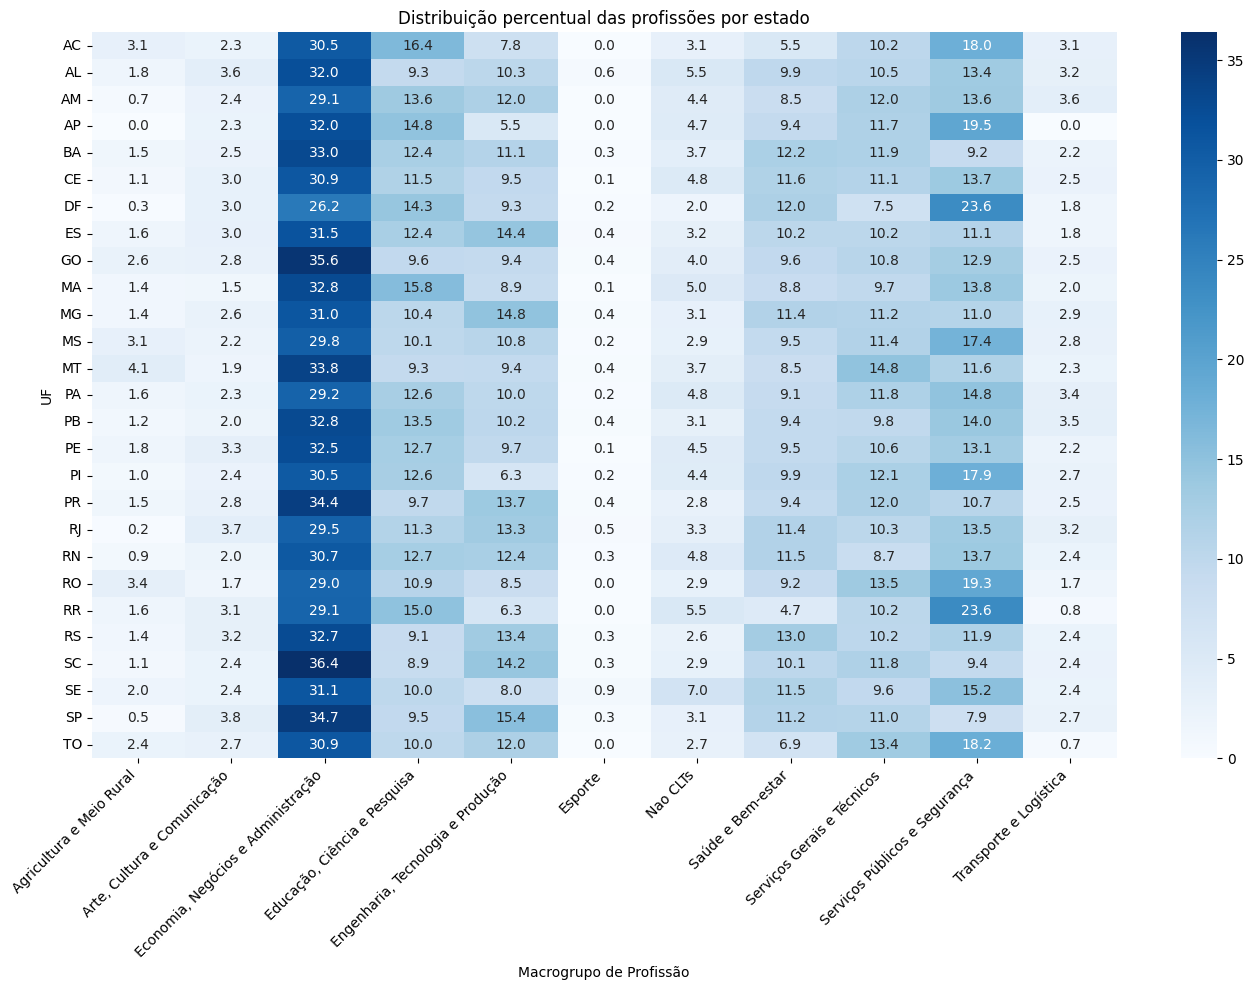

In [31]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Cria a pasta 'images' se não existir
os.makedirs('images', exist_ok=True)

# Plot do gráfico
plt.figure(figsize=(14, 10))
sns.heatmap(tabela_percentual, annot=True, fmt=".1f", cmap="Blues")

plt.title('Distribuição percentual das profissões por estado')
plt.xlabel('Macrogrupo de Profissão')
plt.ylabel('UF')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0, ha='right')
plt.tight_layout()

# Salvar o gráfico na pasta images
plt.savefig('images/distribuicao_profissoes_por_estado.png', dpi=300)

# Exibir o gráfico
plt.show()


In [32]:
dados_tesouro.head()

,Codigo do Investidor,Data de Adesao,Estado Civil,Genero,Profissao,Idade,UF do Investidor,Cidade do Investidor,Pais do Investidor,Situacao da Conta,Operou 12 Meses,Faixa Etária,Grupo_Profissao,Macrogrupo_Profissao
781974,41207596,30/06/2023,Solteiro(a),M,OUTROS,28,RS,SANTA ROSA,BRASIL,A,N,Adulto jovem 18 - 29,Outros,Outros
937737,6333497,04/05/2022,Desquitado(a),F,OUTROS,28,SP,OSASCO,BRASIL,A,N,Adulto jovem 18 - 29,Outros,Outros
907828,2443618,28/09/2017,Solteiro(a),F,OUTROS,35,BA,SALVADOR,BRASIL,D,N,Adulto 30 - 59,Outros,Outros
784628,40995838,16/01/2023,Desquitado(a),M,OUTROS,55,SP,JACAREI,BRASIL,D,N,Adulto 30 - 59,Outros,Outros
662460,22100858,19/06/2023,Solteiro(a),M,AUXILIAR DE ESCRITÓRIO E ASSEMELHADOS,24,SP,ITAQUAQUECETUBA,BRASIL,A,N,Adulto jovem 18 - 29,Serviços Gerais,Serviços Gerais e Técnicos


## 3. Preparação para criação de base que sera classificada

In [33]:
df_idh = df_idh[['UF', 'IDH-M 2021']]
dados_tesouro_idh = dados_tesouro.merge(df_idh, left_on='UF do Investidor', right_on='UF', how='left')

In [39]:
# dados_finais = dados_tesouro.drop(columns=['Codigo do Investidor', 'Faixa Etária', 'Profissao', 'Grupo_Profissao'])
# dados_finais = dados_tesouro.drop(columns=['Codigo do Investidor', 'Faixa Etária', 'Grupo_Profissao', 'Macrogrupo_Profissao'])
# dados_finais = dados_tesouro.drop(columns=['Codigo do Investidor', 'Grupo_Profissao', 'Macrogrupo_Profissao', 'Idade'])
dados_finais = dados_tesouro_idh.drop(columns=['Codigo do Investidor','UF'])

In [40]:
dados_finais.head()

,Data de Adesao,Estado Civil,Genero,Profissao,Idade,UF do Investidor,Cidade do Investidor,Pais do Investidor,Situacao da Conta,Operou 12 Meses,Faixa Etária,Grupo_Profissao,Macrogrupo_Profissao,IDH-M 2021
0,30/06/2023,Solteiro(a),M,OUTROS,28,RS,SANTA ROSA,BRASIL,A,N,Adulto jovem 18 - 29,Outros,Outros,0.771
1,04/05/2022,Desquitado(a),F,OUTROS,28,SP,OSASCO,BRASIL,A,N,Adulto jovem 18 - 29,Outros,Outros,0.806
2,28/09/2017,Solteiro(a),F,OUTROS,35,BA,SALVADOR,BRASIL,D,N,Adulto 30 - 59,Outros,Outros,0.691
3,16/01/2023,Desquitado(a),M,OUTROS,55,SP,JACAREI,BRASIL,D,N,Adulto 30 - 59,Outros,Outros,0.806
4,19/06/2023,Solteiro(a),M,AUXILIAR DE ESCRITÓRIO E ASSEMELHADOS,24,SP,ITAQUAQUECETUBA,BRASIL,A,N,Adulto jovem 18 - 29,Serviços Gerais,Serviços Gerais e Técnicos,0.806


In [41]:
dados_finais.to_parquet("./data/to_classify/sample_data.parquet")